<a href="https://colab.research.google.com/github/noobcoder2000/Fake-Job-Listing/blob/main/FakeJobListing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive

In [3]:
!pip install wordcloud

In [4]:
!pip install -uSpaceCy


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [5]:

import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English



In [6]:
df = pd.read_csv('job_train.csv')

In [7]:
df.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0


In [8]:
df.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0


In [9]:
def split(location):
  l=location.split(',')
  return l[0]
  df['country']= df.location.apply(split)
  data['country'] = data.location.apply(split)
  data['country']

In [10]:
df.fillna('',inplace=True)

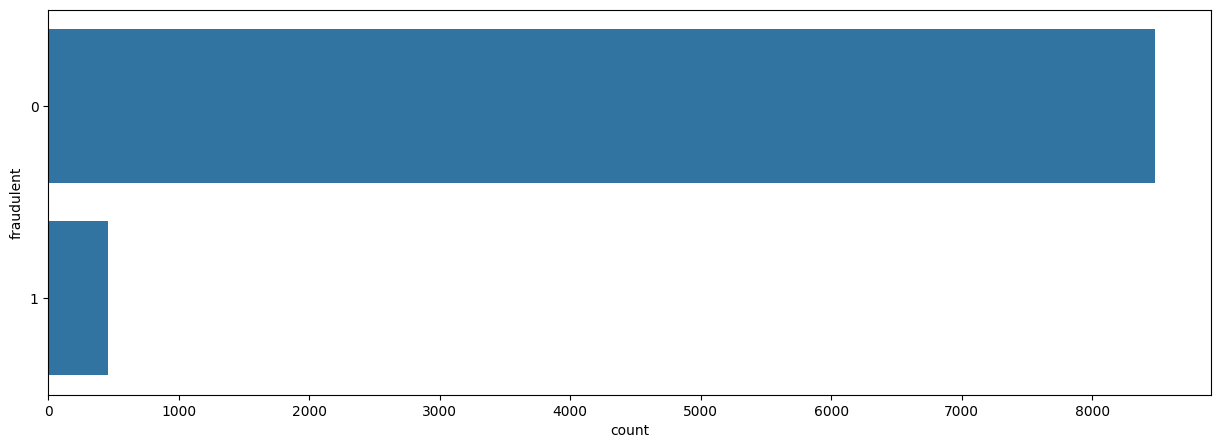

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()

In [12]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    8484
1     456
Name: fraudulent, dtype: int64

In [13]:
exp= dict(df.requirements.value_counts())
del exp['']

In [14]:
exp

{'University degree required.\xa0TEFL / TESOL / CELTA or teaching experience preferred but not necessaryCanada/US passport holders only': 200,
 'University degree required.\xa0TEFL / TESOL / CELTA or teaching experience preferred but not necessaryPositive attitude required.\xa0Canada/US passport holders only': 80,
 '16-18 year olds only due to government funding.Full time availability.': 54,
 "Minimum Requirements:Minimum of 6 months customer service related experience requiredHigh school diploma or equivalent (GED) requiredPreferred Qualifications:Keyboarding and windows environment PC skills required (Word, Excel and PowerPoint preferred)Experience running mail posting equipment a plusExcellent communication skills both verbal and writtenLifting up to 55 lbs with or without accommodationsWillingness and availability to work additional hours if assignedWillingness to submit to a pre-employment drug screening and criminal background checkAbility to effectively work individually or in a

In [15]:
def split(location):
  l=location.split(',')
  return l[0]
  df['country']= df.location.apply(split)


In [16]:
countr=dict(df.location.value_counts()[:14])
del countr['']
countr

{'GB, LND, London': 367,
 'US, NY, New York': 331,
 'GR, I, Athens': 244,
 'US, CA, San Francisco': 241,
 'US, , ': 180,
 'US, TX, Houston': 147,
 'US, DC, Washington': 129,
 'US, IL, Chicago': 127,
 'NZ, N, Auckland': 110,
 'DE, BE, Berlin': 103,
 'US, CA, Los Angeles': 91,
 'US, TX, Austin': 88,
 'GB, , London': 83}

Text(0.5, 0, 'Countries')

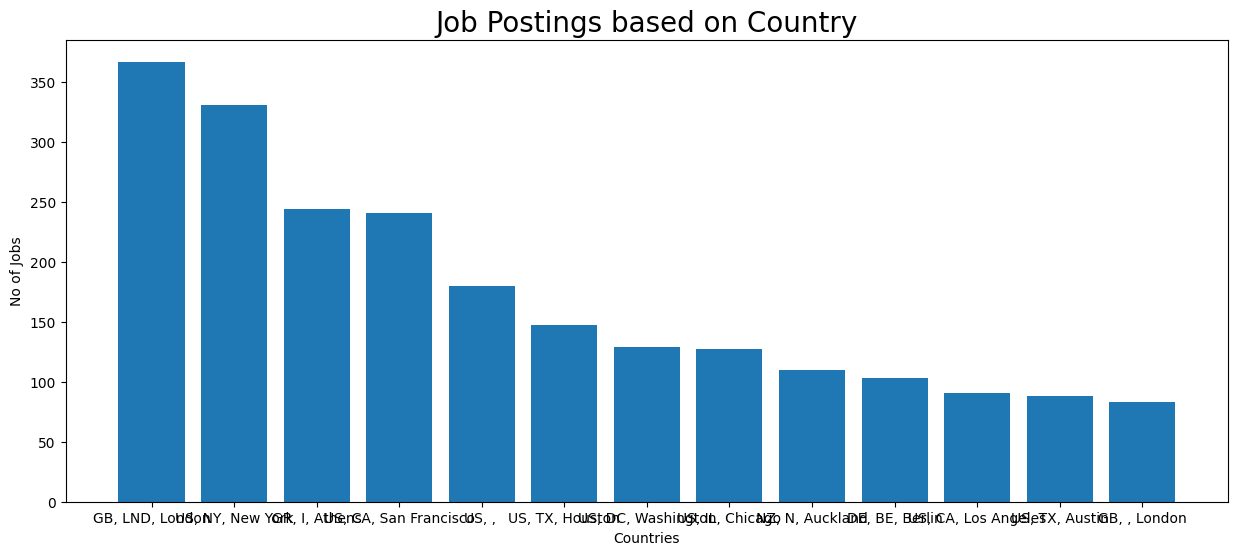

In [17]:
plt.figure(figsize=(15,6))
plt.title('Job Postings based on Country',size=20)
plt.bar(countr.keys(),countr.values())
plt.ylabel('No of Jobs',size=10)
plt.xlabel('Countries',size=10)

In [18]:
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                152
Customer Service Associate                             82
Graduates: English Teacher Abroad (Conversational)     70
English Teacher Abroad (Conversational)                47
English Teacher Abroad                                 44
Account Manager                                        43
Customer Service Associate - Part Time                 42
Software Engineer                                      37
Beauty & Fragrance consultants needed                  32
Web Developer                                          29
Name: title, dtype: int64


In [19]:
fraudjobs_title = df[df.fraudulent==1].title
realjobs_title=df[df.fraudulent==0].title

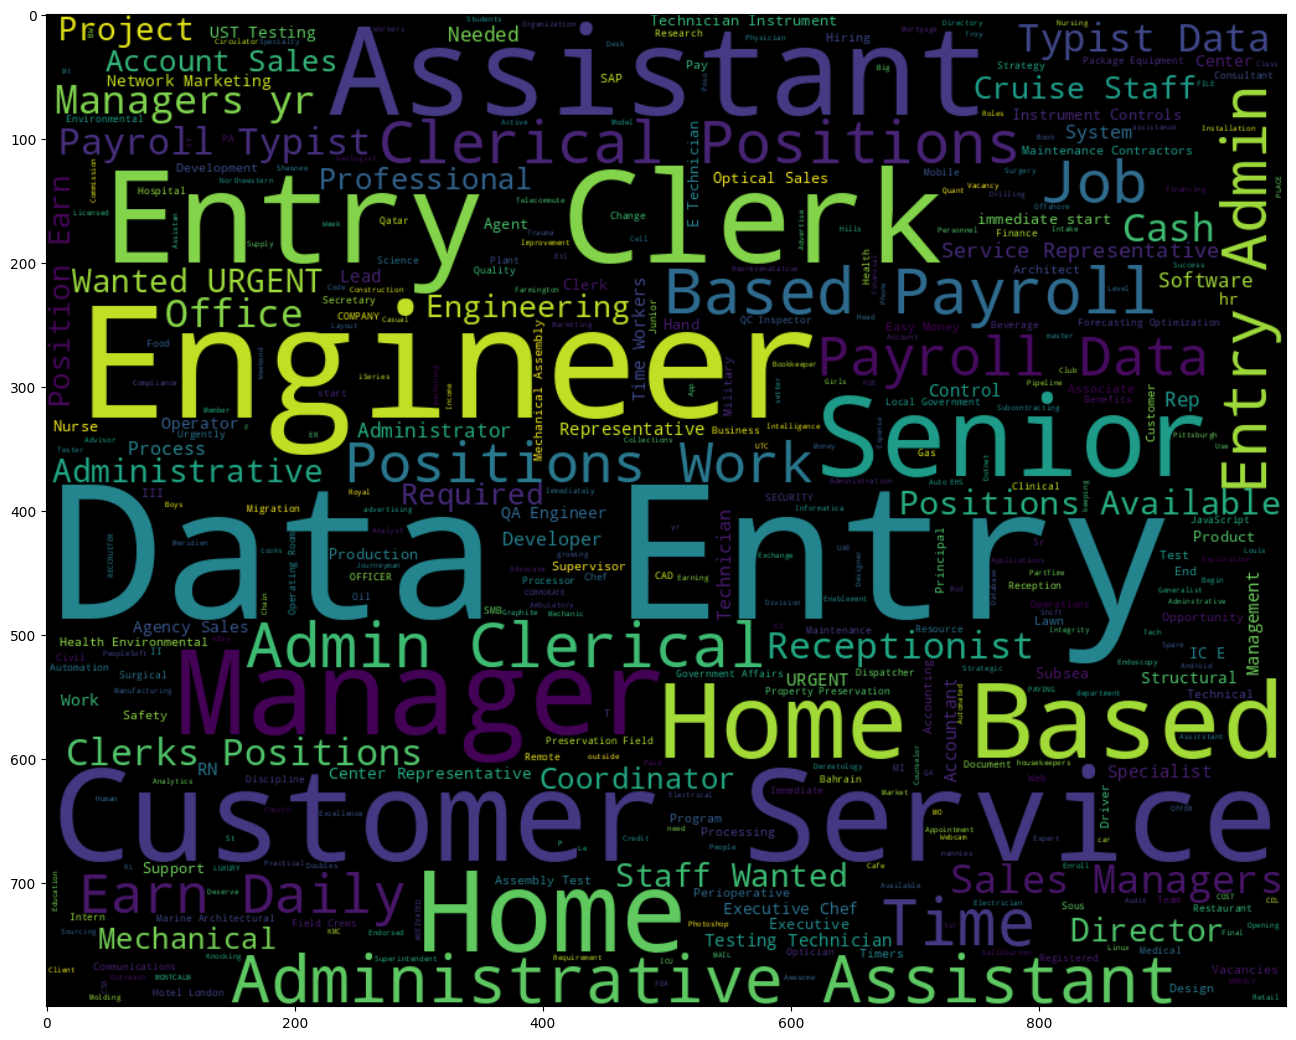

In [20]:
STOPWORDS=spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size =1 ,max_words = 3000 , width =1000, height =800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_title)))
plt.imshow(wc,interpolation = 'bilinear')

In [21]:
# prompt: install spacy and download en

!pip install spacy && python -m spacy download en


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:

nlp=spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()
def spacy_tokenizer(sentence):
   mytokens = parser(sentence)
   mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower() for word in mytokens]
   mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]
   return mytokens
class predictors(TransformerMixin):
  def transform(self, X, **transform_params):
    # Applies the clean_text function to each text in X
    return [clean_text(text) for text in X]

  def fit(self, X, y=None, **fit_params):
    # Doesn't perform any operations; likely a placeholder
    return self

  def get_params(self, deep=True):
    # Returns an empty dictionary
    return {}

# This function is likely used within the transform method to clean the text data
def clean_text(text):
  # Removes whitespaces and converts the text to lowercase
  return text.strip().lower()

In [23]:
df['title'] =df['title'].apply(clean_text)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=100)

# Fit the vectorizer to the text data in 'df['text']' column
x = cv.fit_transform(df['title'])

# Create a new DataFrame 'df1' with the transformed features as columns
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

# Drop the original text column 'text' from the DataFrame 'df'
df.drop(["title"], axis=1, inplace=True)

# Concatenate the DataFrame 'df1' (containing TF-IDF features) with the modified DataFrame 'df'
main_df = pd.concat([df1, df], axis=1)

In [25]:
main_df.head()

,16,18,abroad,account,admin,administrative,administrator,analyst,and,android,...,ux,web,year,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0


In [26]:
Y=main_df.iloc[:,-1]
X=main_df.iloc[:,:-1]
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6258, 106)
(6258,)
(2682, 106)
(2682,)


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# One-Hot Encoding (if your features are categorical)
encoder = OneHotEncoder(handle_unknown='ignore')  # Remove 'sparse' parameter
X_encoded = encoder.fit_transform(X)  # Encode all features at once

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.3)


In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model = rfc.fit(X_train, y_train)

In [36]:
print(X_test)

  (0, 0)	1.0
  (0, 53)	1.0
  (0, 102)	1.0
  (0, 108)	1.0
  (0, 156)	1.0
  (0, 192)	1.0
  (0, 221)	1.0
  (0, 261)	1.0
  (0, 335)	1.0
  (0, 497)	1.0
  (0, 525)	1.0
  (0, 556)	1.0
  (0, 595)	1.0
  (0, 633)	1.0
  (0, 745)	1.0
  (0, 811)	1.0
  (0, 847)	1.0
  (0, 875)	1.0
  (0, 893)	1.0
  (0, 998)	1.0
  (0, 1018)	1.0
  (0, 1037)	1.0
  (0, 1085)	1.0
  (0, 1126)	1.0
  (0, 1132)	1.0
  :	:
  (2681, 4631)	1.0
  (2681, 4719)	1.0
  (2681, 4763)	1.0
  (2681, 4869)	1.0
  (2681, 4940)	1.0
  (2681, 4997)	1.0
  (2681, 5020)	1.0
  (2681, 5038)	1.0
  (2681, 5126)	1.0
  (2681, 5162)	1.0
  (2681, 5175)	1.0
  (2681, 5207)	1.0
  (2681, 5259)	1.0
  (2681, 5285)	1.0
  (2681, 5371)	1.0
  (2681, 5411)	1.0
  (2681, 5454)	1.0
  (2681, 5498)	1.0
  (2681, 5596)	1.0
  (2681, 6061)	1.0
  (2681, 14496)	1.0
  (2681, 20907)	1.0
  (2681, 21884)	1.0
  (2681, 21887)	1.0
  (2681, 21888)	1.0


In [37]:

pred = rfc.predict(X_test)
score=accuracy_score(y_test,pred)
score

0.9615958240119314

In [38]:

print("Classification Report\n")
print(classification_report(y_test,pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2530
           1       0.92      0.36      0.51       152

    accuracy                           0.96      2682
   macro avg       0.94      0.68      0.75      2682
weighted avg       0.96      0.96      0.95      2682

Confusion Matrix

[[2525    5]
 [  98   54]]
